In [2]:
from model import UNetXception
from dataset import Dataset

import model

import numpy as np

## Load Dataset and Instantiate Model

In [3]:
d = Dataset()
training_data, validation_data = Dataset.split(d.get_training_data(), validation_part=0.3)

m = model.UNetXception(model_filename="unet-model.ckpt")

## Run Training

In [ ]:
m.train(training_data, validation_data=validation_data)

## Perform Prediction

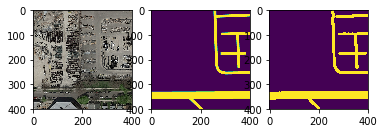

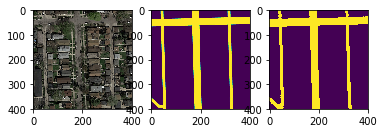

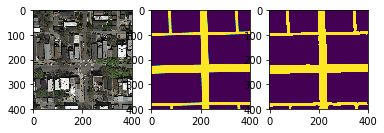

In [8]:
import matplotlib.pyplot as plt

# choose arbitrary subset of validation images
lower = 5
upper = 8
prediction_in = np.array(list(map(lambda p: p[0], validation_data)))[lower:upper]
prediction_gt = np.array(list(map(lambda p: p[1], validation_data)))[lower:upper]

# actual prediction
prediction_results = m.predict(prediction_in)

for idx in range(lower, upper):
    plt.figure(figsize=(6, 4))
    plt.subplot(1, 3, 1).imshow(prediction_in[idx - lower])
    plt.subplot(1, 3, 2).imshow(prediction_gt[idx - lower])
    plt.subplot(1, 3, 3).imshow(prediction_results[idx - lower])
    plt.show()

## Compute Submission File / F1 Score

In [ ]:
m.compute_f1_score(validation_data, plot=2)

In [ ]:
m.compute_submission("submission-file.csv")